Introduce el recurso:Electricidad
Introduce el codigo del centro:3
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


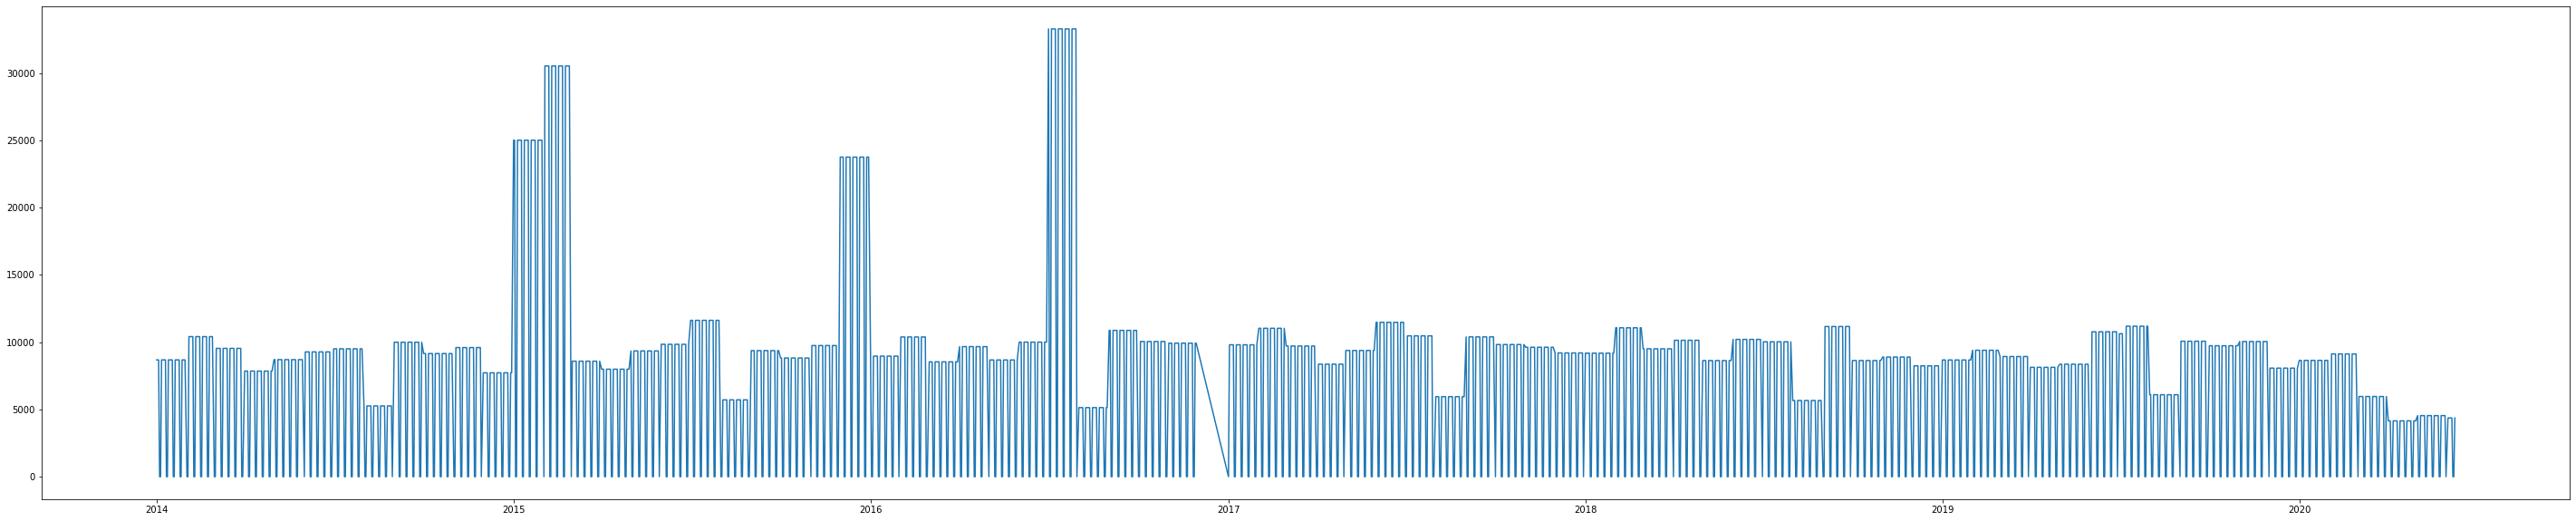

In [5]:
import pandas as pd
import numpy as np
from dateutil.rrule import rrule, MONTHLY

from datetime import datetime
from matplotlib import pyplot

#Filtrado de los datos que nos interesan.
Datos = pd.read_csv('consumosUPMcorrecto.csv', delimiter=',', header=0, )

x1=input("Introduce el recurso:")

Datos = Datos[Datos.Recurso==x1]

x2=input("Introduce el codigo del centro:")

Datos = Datos[Datos.Centro==x2]

Datos.pop('Campus')
Datos.pop('Dirección')
Datos.pop('Centro')
Datos.pop('TipoCentro')
Datos.pop('FechaEmisionFactura')
Datos.pop('ConsumoP1')
Datos.pop('ConsumoP2')
Datos.pop('ConsumoP3')
Datos.pop('ConsumoP4')
Datos.pop('ConsumoP5')
Datos.pop('ConsumoP6')
Datos.pop('AñoFinLectura')
Datos.FechaInicioLectura = pd.to_datetime(Datos.FechaInicioLectura)
Datos.FechaFinLectura = pd.to_datetime(Datos.FechaFinLectura)
#creación CSV diario
#Dia de la semana (L-D)
#Día (fecha)
#Consumo/día

data={'Dia_semana':['L'],'Dia':['0000-00-00'],'ConsumoDia':[0]}
df_data = pd.DataFrame(data)
#print(df_data)
#creamos dataframe desde 01/01/2014 hasta 31/12/2020
from datetime import timedelta, date
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
#FECHA INICIO Y FIN DEL BUCLE
start_date = date(2014, 1, 1)
end_date = date(2020, 6, 9)
for single_date in daterange(start_date, end_date):
    dia_sem=single_date.strftime("%a")
    intervalo_inf=Datos[Datos.FechaInicioLectura <= pd.to_datetime(single_date)]
    intervalo=intervalo_inf[intervalo_inf.FechaFinLectura > pd.to_datetime(single_date)]
    Consumo_intervalo=pd.to_numeric(intervalo["ConsumoTotal"]).sum()
    if Consumo_intervalo > 0:
        fecha_fin=intervalo['FechaFinLectura'].iloc[0]
        fecha_ini=intervalo['FechaInicioLectura'].iloc[0]
        Numero_dias_validos_intervalo = np.busday_count(fecha_ini.date(), fecha_fin.date() + timedelta(days=1))
        Consumo_dia = Consumo_intervalo / Numero_dias_validos_intervalo
        if np.is_busday(single_date) == True:
            new_row={'Dia_semana':dia_sem,'Dia':str(single_date),'ConsumoDia':Consumo_dia}
            df_data=df_data.append(new_row,ignore_index=True)
            single_date= single_date+ timedelta(days=1)
        else:
            new_row = {'Dia_semana': dia_sem, 'Dia': str(single_date), 'ConsumoDia': 0}
            df_data = df_data.append(new_row, ignore_index=True)
            single_date= single_date+ timedelta(days=1)
    else:
        print ("ERROR")

df_data=df_data[1:]
# df_data.to_csv('diario.csv',index=False)

df_data=df_data.set_index('Dia')
df_data.index = pd.to_datetime(df_data.index)

pyplot.figure(figsize=(50,10))
pyplot.plot(df_data['ConsumoDia'])



In [6]:

df_mensual = df_data.resample('MS').sum()
print (df_mensual.head(10))
df_mensual= df_mensual.reset_index()
print (df_mensual.head(10))

df_mensual.to_csv(x1+'-'+x2+'.csv',index=False)

print('fin')

               ConsumoDia
Dia                      
2014-01-01  191055.652174
2014-02-01  197864.100000
2014-03-01  190816.190476
2014-04-01  164932.090909
2014-05-01  191478.000000
2014-06-01  185563.809524
2014-07-01  209176.956522
2014-08-01  110519.000000
2014-09-01  209979.954545
2014-10-01  201401.391304
         Dia     ConsumoDia
0 2014-01-01  191055.652174
1 2014-02-01  197864.100000
2 2014-03-01  190816.190476
3 2014-04-01  164932.090909
4 2014-05-01  191478.000000
5 2014-06-01  185563.809524
6 2014-07-01  209176.956522
7 2014-08-01  110519.000000
8 2014-09-01  209979.954545
9 2014-10-01  201401.391304
fin


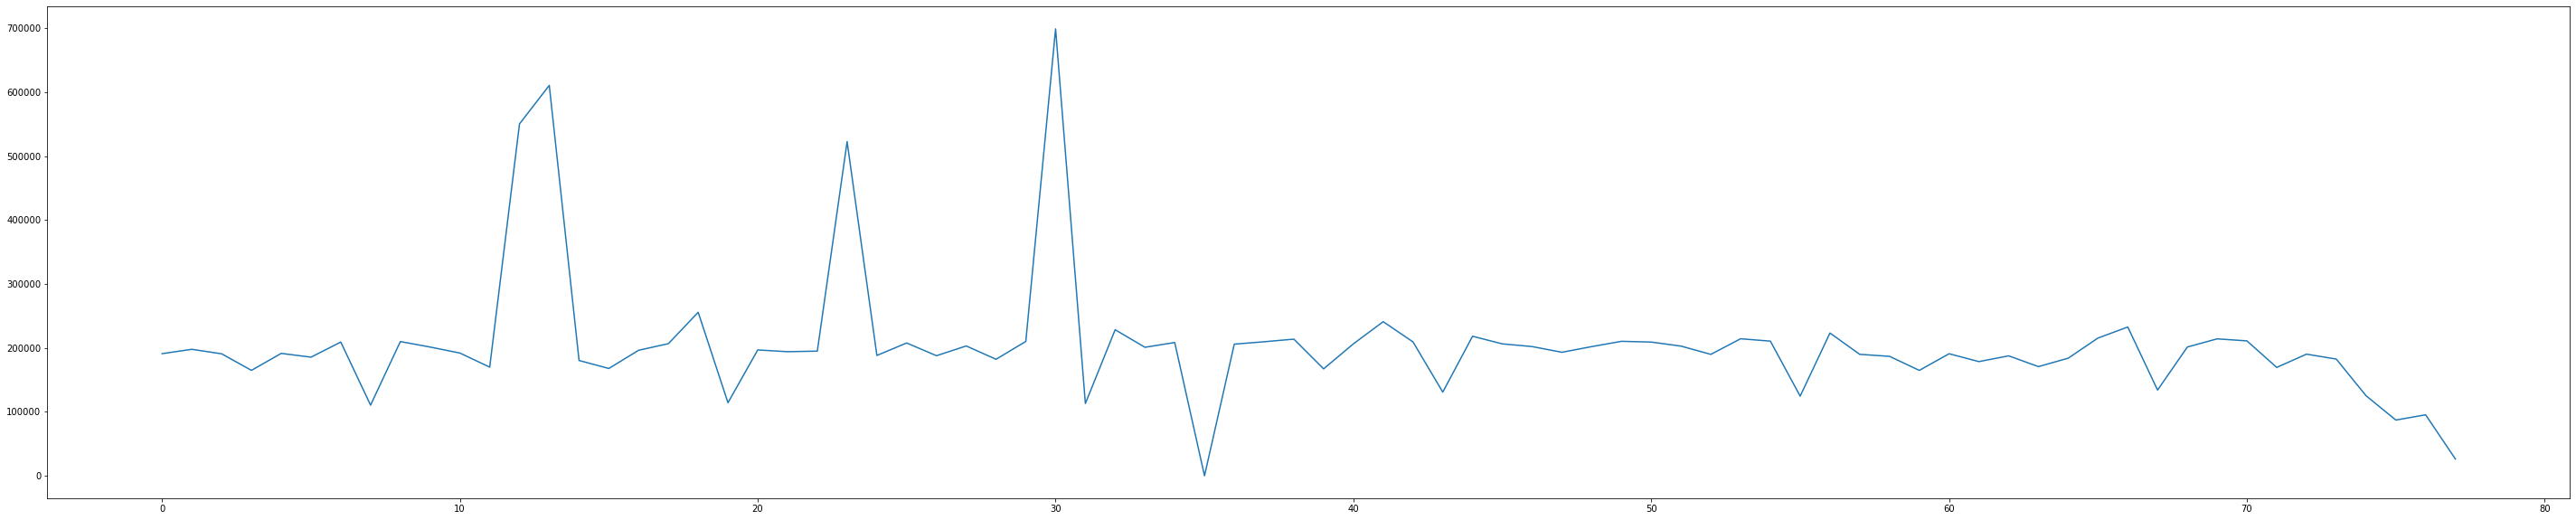

In [7]:
pyplot.figure(figsize=(50,10))
pyplot.plot(df_mensual['ConsumoDia'])